In [15]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import re
import io
import json
import ftfy
from skimage.segmentation import clear_border
from imutils import contours 
from IPython.display import Image, display
import imutils
import numpy as np


In [1]:
!pip install pytesseract
!pip install ftfy --quiet --user
!pip install ftfy --no-warn-script-location

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
!pip install scikit_image --user
!pip install imutils --user

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=7c61044e3889f898bfb379e805cbde2021525f4af56ad7f0565cfe96a7ac9392
  Stored in directory: c:\users\danus\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [9]:
!pip install  pillow --user
!pip install pywavelets
!pip install tensorflow-addons


In [12]:
!pip install opencv-contrib-python --user

In [13]:
!pip install opencv-python-headless --user

In [14]:
!pip install opencv_python 

In [16]:
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [17]:
from PIL import Image

img = Image.open("en.jpg")


In [ ]:
print(img.format, img.size, img.mode)
img.show()


In [20]:
output_text=pytesseract.image_to_string(img)
output_text.strip().split("\n")

['Form T1',
 '',
 'KEQUEST FOR PRANSSISSION OF LNEES',
 '',
 'Uh ktean uP nadie sot Doral Hite cre pase eb death fine Dt 8 Maldeer',
 '',
 'Request foe deletion ef namens ol ins Do 8 Mulder',
 '',
 'mee eR roe yobs',
 '',
 'rr rr s',
 '',
 'Bets of seme?',
 '',
 're ad',
 'Ge RE °',
 '. tus Cane pee UMass ete?',
 'Sem geben',
 'ws been. r',
 '',
 '10h set ssaey Lt Rela',
 'Nome res . Sepewrare',
 'Sone ae . . . Lo',
 "' . vee t"]

In [21]:
img = cv2.imread("en.jpg")

In [7]:
!pip install requests
!pip install pyyaml torch torchvision tqdm



DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install tensorflow_hub

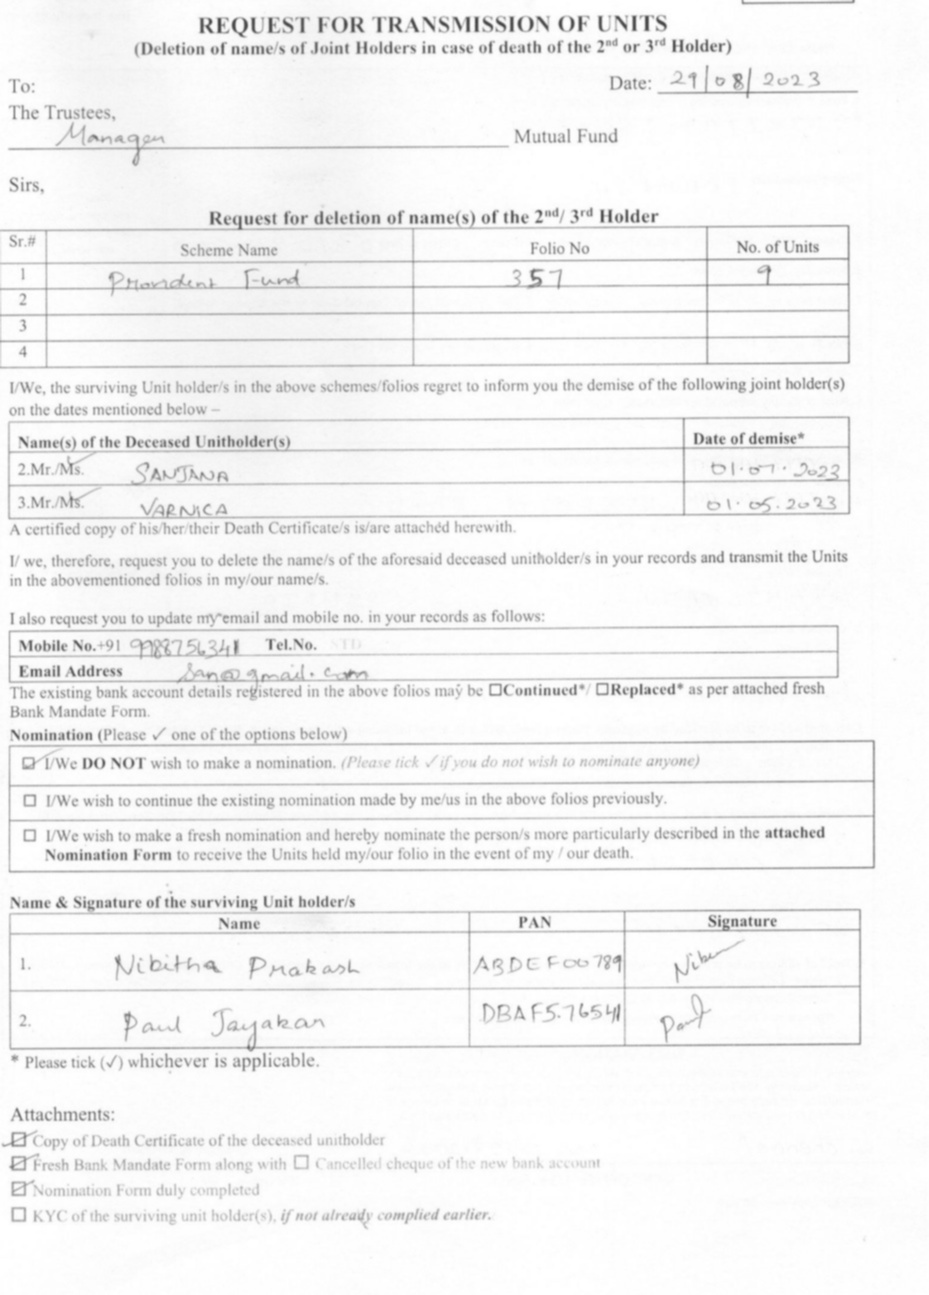

REQUEST FOR TRANSMISSION OF UNITS

(Deletion of name/s of Joint Holders in case of death of the 2" or 3" Holder)

To: Date: _21/¢ B/ 2023

The Trustees,

ansqe Mutual Fund
Sirs,
Request for deletion of name(s) of the 2"4/ 3" Holder

a Scheme Name Folio No No. of Units
l Prravice nt Fund 5S sl
EF}

3

a

I/We, the surviving Unit holder/s in the above schemes/folios regret to inform you the demise of the following joint holder(s)
‘on the dates mentioned below —

Name(s) of the Deceased Unitholder(s) Date of demise*
2MENS auton Shea RS
ec ee ae Rives ans

A certified copy of his/her/their Death Certificate/s is/are attached herewith.

V/ we, therefore, request you to delete the name/s of the aforesaid deceased unitholder/s in your records and transmit the Units
in the abovementioned folios in my/our names.

Talso request you to update my“email and mobile no. in your records as follows:

Mobile No.+91_ ARZ7 5.341 Tel.No. RS:

Email Address AAR Apnail» Coa
The existing bank account details 

In [23]:
import cv2
import pytesseract

# Load the image of the bank cheque
cheque_image = cv2.imread('poc1.jpeg')

# Check if the image was loaded successfully
if cheque_image is None:
    print("Error: Unable to load the image.")
else:
    # Resize the image to a higher resolution
    #cheque_image = cv2.resize(cheque_image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

    # Enhance contrast using histogram equalization
    cheque_image_gray = cv2.cvtColor(cheque_image, cv2.COLOR_BGR2GRAY)
    #cheque_image_enhanced = cv2.equalizeHist(cheque_image_gray)

    # Apply Gaussian blur for noise reduction
    cheque_image_enhanced = cv2.GaussianBlur(cheque_image_gray, (3, 3), 0)  

    # Binarization using adaptive thresholding
    #_, cheque_image_binarized = cv2.threshold(cheque_image_enhanced, 0, 255, cv2.THRESH_BINARY )

    # Save the enhanced image to a file
    cv2.imwrite("cheque_imge_enhance.jpg", cheque_image_enhanced)
    #cv2.imwrite('enhanced_cheque_image.jpg', cheque_image_binarized)
    cv2.imwrite('gray.jpg', cheque_image_gray)
    from IPython.display import Image, display

# Display the enhanced image saved earlier
    display(Image(filename='cheque_imge_enhance.jpg'))

    # Perform OCR on the preprocessed image
    ocr_result = pytesseract.image_to_string(cheque_image_gray)

    # Extracted handwritten data
    handwritten_data = ocr_result.strip()

    # Print the extracted data
    print(handwritten_data)


In [3]:
!pip install pillow --user

In [26]:
import tempfile

import cv2
import numpy as np
from PIL import Image

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    # TODO : Implement using opencv
    temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(temp_filename)
    return im_new

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size,Image.LANCZOS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

In [23]:
import tempfile
from PIL import Image, ImageFilter

# ...

#im_resized = im.resize(size, Image.ANTIALIAS)  # Use Image.ANTIALIAS from ImageFilter module

import cv2
import numpy as np
from PIL import Image
from IPython.display import Image, display
IMAGE_SIZE = 1800
BINARY_THREHOLD = 180
DPI = 300

def process_image_for_ocr(file_path):
    temp_filename = set_image_dpi(file_path)
    im_new = remove_noise_and_smooth(temp_filename)
    return im_new

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    im_resized = im.resize(size, Image.LANCZOS)  # Use 'ANTIALIAS' as a string
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(DPI, DPI))
    return temp_filename

# The rest of your code...


def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

In [27]:
from PIL import Image

re = process_image_for_ocr('poc1.jpeg')
cv2.imwrite('re.jpg', re)

True

In [25]:
print(re)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


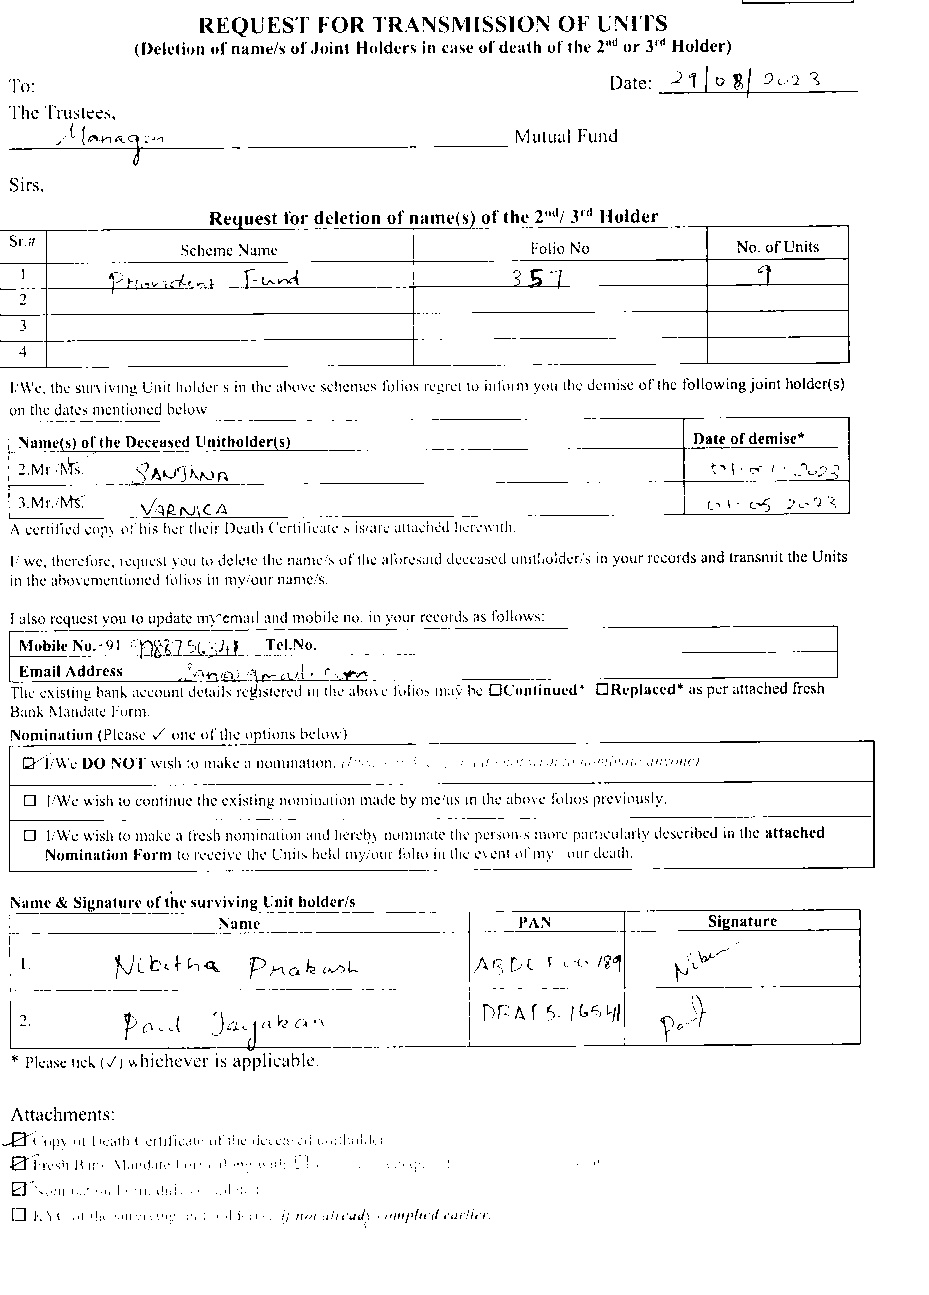

In [28]:
from IPython.display import Image, display
Image(filename='re.jpg')

In [29]:

text = pytesseract.image_to_string('re.jpg', config='--psm 6')
print("Text:", text)

Text: REQUEST FOR TRANSMISSION OF UNITS
(Deletion of name/s of Joint Holders in case of death of the 2" or 3 Holder)
To: Date: 21] 0 Bf 962 3
The Trustees,
E *lonag bea . . Mutual Fund
Sirs,
_ Request tor deletion of name(s) of the 2"Y 3 Holder _
Sea ___Seheme Name | “Folia Ne
OL Pr victent Etund 35°
7 [|
— |. —_—
a
I'We, the surviving Unit holier s in the above schemes folies regret to fuform you the demise of the following joint holder(s)
on the dates mentioned below - 7 _
| Name(s) of the Deceused Unitholder(s) oe Date of demise*
I
(MEMS vepnica tg 8
A certified copy of his her their Death Certifivate » iware uttachéd Nerewith
F we, therefore, request you te delete the name's of the aforesaid deceased unsttwider’s in your records and transmit the Units
in the abovementioned falivs in myéour name's
Talso request you to update myemail and mobile ne. in your records as follows:
Mobile Nu.-91 “PYRZT SU iF _ TelNo. ok. _
| Email Address Fas eal) Cope _.
Tite existing bank accounl details

In [28]:
!sudo apt-get install libgtk2.0-dev
!sudo apt-get install pkg-config

In [35]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
image_name = 'en.jpg'
im = Image.open(image_name) 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('1')
im.save(image_name)
text = pytesseract.image_to_string(Image.open(image_name))
print(text)

Form T1

KEQUEST FOR PRANSSISSION OF LNEES

Uh ktean uP nadie sot Doral Hite cre pase eb death fine Dt 8 Maldeer

Request foe deletion ef namens ol ins Do 8 Mulder

mee eR roe yobs

rr rr s

Bets of seme?

re ad
Ge RE °
. tus Cane pee UMass ete?
Sem geben
ws been. r

10h set ssaey Lt Rela
Nome res . Sepewrare
Sone ae . . . Lo
' . vee t




In [13]:
!pip install opencv-python-headless pytesseract pillow


In [36]:

micr_text = pytesseract.image_to_string(image_name, config='--psm 6')
print("MICR Text:", micr_text)

MICR Text: Form T1
KEQUEST FOR PRANSSMISSION OF LNEES
Un ktons eb maine sot Sorat Hlth cre case otcbeath ihe 2 a 8 Heider:
Pe “ey nue
ag ease
Request foe deletion ef namenr el ins Doo U Mubder
me «ng moe woe
tg gee bat s ”
Nemes oN Uer ened 1 ethehdeels | Bate of semen?
woe hoa 2
wor .
Some ey tee
beet vanes oes ee
= we Lew ene TMian ote a tethet
Seem aerten
wos Basen. .
* ‘ : : Es ened
X cetim atin hare a .
Nees A Nae etare dm cere esing Fut Radda: &
Nome res . Megeerace
ae a oa . Lo
H . a !
\ non



In [ ]:
def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False,   suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

image = cv2.imread('poc1.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 10, 50)
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
screenCnt = None
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
pts = np.array(screenCnt.reshape(4, 2) * ratio)
warped = four_point_transform(orig, pts)
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype="float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 41)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

In [33]:
import cv2
import numpy as np
import pytesseract

def get_acc(image_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1920, 1080))
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    luminance, a, b = cv2.split(lab)

    hist, bins = np.histogram(luminance, 256, [0, 256])

    mean = int((np.argmax(hist) + np.argmin(hist)) / 2)

    luminance[luminance > mean] = 255
    luminance[luminance <= mean] = 0

    # Read template
    template = cv2.imread('re.jpg', 0)

    # Ensure that the luminance and template images have the same size
    template = cv2.resize(template, (image.shape[1], image.shape[0]))

    thresh = cv2.threshold(template, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Set difference
    diff = cv2.subtract(luminance, template)

    text = pytesseract.image_to_string(diff, config='--oem 1 --psm 3')

    return text

# Example usage:
result = get_acc('poc1.jpeg')
print(result)


SUCPFY Cpr Lips rs
apr Bt Malden p

2raftosf >.-2 =

URI Cp i Ess I Coe TR AA Pe SS RDO
CEDdebedionca aT muanmmess apf Jariona Hicelelees fen cansa api alarscily af glow S04

fate:

Pedantasash Preasaed

of been og nen _ _
Sirs.
Reauecst Too deletion of mssmetsp GT timer Be BO Vilaviiallaee
See _ a Sehbeme Nume | __ Folie No |
2.4 9S eee ete na Jone et 26-7
a. | 3
a = - -
Aika Unie bolger sin the above senemes rae yorta the Ger following joint holderts>
ne¢s) of the (Desesssest LU coirinaiclertsy _. a a Ibmee of clecnise™
_ - _ ete ewe
eee ae

2M ATR. tA | 7
Vaennc a if o>

bis Hor theis Dcads Certi

peed

© satis

wileiderss ims your rccords and transmit the Units

Ieeresuid deceased &

Sot ie

Pst Sou tee delete he sane

ewe wea.
in the abovementioned Toles bn rowan names
Pulse rcquest you to update wycemunl and mebile mo in seur cccords as follows:

Jan.

ee ee
ORs plescd* as per attached fresh

Bey Cite attseee ee daekicom raneS HS CFC oawovdecwcasah ~

The exisene &
Bask Niamdate 

In [40]:
custom_config = r'--oem 3 --psm 6 -l eng'  # Use English language, page segmentation mode 6
text = pytesseract.image_to_string(image, config=custom_config)

In [42]:
text.strip().split("\n")

['REQUEST FOR TRANSMISSION OF UNITS',
 '(Deletion of name/s of Joint Holders in case of death of the 2" or 3"? Holder)',
 'To: Date: 21/2 B/ 2023',
 'The Trustees,',
 'Mimasiape Mutual Fund',
 'Sirs,',
 'Request for deletion of name(s) of the 2"4/ 3" Holder',
 'oe',
 'ie oe ee',
 'ia ee ee',
 'cE ee ee',
 'Ga i ae ee',
 'We, the surviving Unit holder/s in the above schemes/folios regret to inform you the demise of the following joint holder(s)',
 'on the dates mentioned below —',
 'Name(s) of the Deceased Unitholder(s}',
 '2.Mr./MS. ANTAUA Slot Joo',
 'A certified copy of his/her/their Death Certificate/s is/are attachéd herewith.',
 'V/ we, therefore, request you to delete the name/s of the aforesaid deceased unitholder/s in your records and transmit the Units',
 'in the abovementioned folios in my/our name/s',
 'Talso request you to update my"email and mobile no. in your records as follows:',
 'Mobile No.+91 Re Tel.No._ i',
 'Email Address Dan@ Apna» Cam',
 'The existing bank account

In [49]:
extracted_text = pytesseract.image_to_string('re.jpg', config='--psm 6')  # psm 6 assumes a single block of text

    # Filter the extracted text to keep only numbers
numbers = ''.join(filter(str.isdigit, extracted_text))

numbers


'2321096232335778917911112421654'

In [ ]:
import cv2
import numpy as np
import imutils
from PIL import Image
import tempfile
import pytesseract

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return temp_filename

# Load your image and preprocess it
input_image_path = 'poc1.jpeg'
image = cv2.imread(input_image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 10, 50)

# Find contours in the binary image after applying thresholding
_, thresh = cv2.threshold(edged, 150, 255, cv2.THRESH_BINARY)
cnts = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

# Filter out small contours
filtered_contours = [c for c in cnts if len(c) > 0]

# Sort the remaining contours by area
sorted_contours = sorted(filtered_contours, key=lambda x: cv2.contourArea(x), reverse=True)[:5]
screenCnt = None

for c in sorted_contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break

# Do further processing here (warping, perspective correction, etc.) if needed

# Example usage of OCR on the processed image
if screenCnt is not None:
    # Warp the perspective to get a top-down view of the region of interest
    pts = np.array(screenCnt.reshape(4, 2) * ratio)
    warped = four_point_transform(image, pts)

    # Extract text from the processed image using Tesseract OCR
    text = pytesseract.image_to_string(warped, config='--oem 1 --psm 3')

    # Print the extracted text
    print("Extracted Text:", text)
else:
    print("No valid contour found")

# Further processing and handling of extracted text can be added as needed


In [ ]:
!pip install opencv_python --user

In [2]:
!pip install paddlepaddle --user
!pip install paddleocr --user
!pip install --upgrade tensorflow tensorboard
!pip install --upgrade pip
!pip install --upgrade paddlepaddle


  Obtaining dependency information for protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 from https://files.pythonhosted.org/packages/ba/ae/e286be9bee0dee7c5c923cc87f26bf52f172c322cbcea2e2ca9a42abd1f1/protobuf-4.24.4-cp39-cp39-win_amd64.whl.metadata
  Using cached protobuf-4.24.4-cp39-cp39-win_amd64.whl.metadata (540 bytes)
Using cached protobuf-4.24.4-cp39-cp39-win_amd64.whl (430 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddlepaddle 2.5.1 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 4.24.4 which is incompatible.
paddlepaddle-gpu 2.5.1 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 4.24.4 which is incompatible.


  Using cached protobuf-3.20.2-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [6]:
!pip install --upgrade charset_normalizer --user


DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
from paddleocr import PaddleOCR
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
ocr = PaddleOCR(use_angle_cls=True)

[2023/10/10 23:05:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\danus/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\danus/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [3]:
img_path = 'poc1.jpeg'	
result = ocr.ocr(img_path)

[2023/10/10 23:05:37] ppocr DEBUG: dt_boxes num : 64, elapsed : 0.9210860729217529
[2023/10/10 23:05:38] ppocr DEBUG: cls num  : 64, elapsed : 0.8624143600463867
[2023/10/10 23:05:56] ppocr DEBUG: rec_res num  : 64, elapsed : 18.169621229171753


In [10]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image

# Initialize PaddleOCR
ocr = PaddleOCR(lang='en')  # need to run only once to download and load model into memory
img_path = 'poc1.jpeg'
result = ocr.ocr(img_path, cls=False)

# Extract boxes, texts, and scores
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Convert scores to float (handle cases where scores are tuples)
scores = [float(score[0]) if isinstance(score, tuple) else float(score) for score in scores]

# Define a threshold for filtering low-confidence text
threshold = 0.5

# Filter out low-confidence text
filtered_boxes = []
filtered_txts = []
filtered_scores = []

for box, txt, score in zip(boxes, txts, scores):
    if score >= threshold:
        filtered_boxes.append(box)
        filtered_txts.append(txt)
        filtered_scores.append(score)

# Create an image with the filtered results
image = Image.open(img_path).convert('RGB')
im_show = draw_ocr(image, filtered_boxes, filtered_txts,font_path='simfang.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')


[2023/10/10 23:13:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\danus/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\danus/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [15]:
from paddleocr import PaddleOCR, draw_ocr
import math

# Initialize PaddleOCR
ocr = PaddleOCR()

# Process the image
img_path = '1.jpeg'
result = ocr.ocr(img_path, cls=False)

# Initialize an empty list to store the detected text
detected_text = []

# Iterate through the OCR result
for line in result[0]:
    # Get the text and score
    text = line[1][0]
    score = float(line[1][1]) if not math.isnan(line[1][1]) else 0.0

    # Check if the score is above a certain threshold (e.g., 0.5)
    if score >= 0.5:
        detected_text.append(text)

# Join the detected text lines
extracted_text = '\n'.join(detected_text)

# Print the extracted text
print(extracted_text)

# Draw the result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [float(line[1][1]) if not math.isnan(line[1][1]) else 0.0 for line in result[0]]
im_show = draw_ocr(image, boxes, txts, scores, font_path='simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result1.jpg')


[2023/10/10 23:23:16] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\danus/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\danus/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [22]:
def save_ocr(img_path, out_path, result, font):
  save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')
 
  image = cv2.imread(img_path)
 
  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]
 
  im_show = draw_ocr(image, boxes, txts, scores, font_path=font)
  
  cv2.imwrite(save_path, im_show)
 
  img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

In [1]:
import paddleocr

In [16]:
from paddleocr import PaddleOCR, draw_ocr
import math

# Initialize PaddleOCR
ocr = PaddleOCR()

# Process the image
img_path = 'idk.jpeg'
result = ocr.ocr(img_path, cls=False)

# Initialize an empty list to store the detected text
detected_text = []

# Iterate through the OCR result
for line in result[0]:
    # Get the text and score
    text = line[1][0]
    score = float(line[1][1]) if not math.isnan(line[1][1]) else 0.0

    # Check if the score is above a certain threshold (e.g., 0.5)
    if score >= 0.5:
        detected_text.append(text)

# Join the detected text lines
extracted_text = '\n'.join(detected_text)

# Print the extracted text
print(extracted_text)

# Draw the result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [float(line[1][1]) if not math.isnan(line[1][1]) else 0.0 for line in result[0]]
im_show = draw_ocr(image, boxes, txts, scores, font_path='simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result2.jpg')

[2023/10/10 23:24:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\danus/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\danus/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [2]:
!pip install paddleocr

^C


  Obtaining dependency information for paddleocr from https://files.pythonhosted.org/packages/8f/d0/1a2f9430f61781beb16556182baa938e8f93c8b46c27ad5865a5655fae05/paddleocr-2.7.0.3-py3-none-any.whl.metadata
  Using cached paddleocr-2.7.0.3-py3-none-any.whl.metadata (26 kB)
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/3d/97/a09a526eee08683922ca2e37c69742ffdcc879ee40bfe29d3e3d55e821c0/scikit_image-0.22.0-cp39-cp39-win_amd64.whl.metadata
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Obtaining dependency information for pyclipper from https://files.pythonhosted.org/packages/97/d7/78140d011dbe7887a8205222e0ddfc0fc60a2b6223202b4504de2ebda3e1/pyclipper-1.3.0.post5-cp39-cp39-win_amd64.whl.metadata
  Using cached pyclipper-1.3.0.post5-cp39-cp39-win_amd64.whl.metadata (9.2 kB)
  Using cached lmdb-1.4.1-cp39-cp39-win_amd64.whl (105 kB)
  Obtaining dependency information fo

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-opencv-utils 0.0.4 requires scikit-learn, which is not installed.
ultralytics 8.0.191 requires py-cpuinfo, which is not installed.
ultralytics 8.0.191 requires torch>=1.8.0, which is not installed.
ultralytics 8.0.191 requires torchvision>=0.9.0, which is not installed.
